In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5SSR1G/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5SSR1G/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5SSR1G/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 121s 280ms/step - loss: 0.6542 - accuracy: 0.5961 - val_loss: 0.5421 - val_accuracy: 0.7329
Epoch 2/10
391/391 [==============================] - 110s 278ms/step - loss: 0.5462 - accuracy: 0.7177 - val_loss: 0.3871 - val_accuracy: 0.8302
Epoch 3/10
391/391 [==============================] - 111s 281ms/step - loss: 0.3050 - accuracy: 0.8808 - val_loss: 0.3488 - val_accuracy: 0.8484
Epoch 4/10
391/391 [==============================] - 112s 282ms/step - loss: 0.2149 - accuracy: 0.9215 - val_loss: 0.3346 - val_accuracy: 0.8614
Epoch 5/10
391/391 [==============================] - 112s 283ms/step - loss: 0.1714 - accuracy: 0.9387 - val_loss: 0.3417 - val_accuracy: 0.8618
Epoch 6/10
391/391 [==============================] - 111s 282ms/step - loss: 0.1395 - accuracy: 0.9533 - val_loss: 0.3866 - val_accuracy: 0.8577
Epoch 7/10
391/391 [==============================] - 112s 283ms/step - loss: 0.1109 - accuracy: 0.9651 - val_loss: 0.4109 -

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

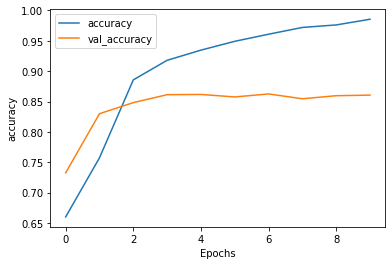

In [14]:
plot_graphs(history, 'accuracy')

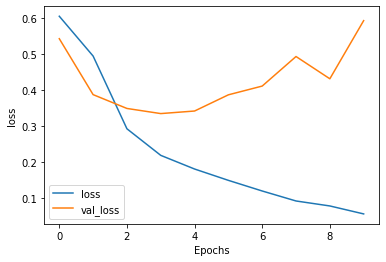

In [15]:
plot_graphs(history, 'loss')

# Test

In [16]:
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
sample_texts = ["If you liked the animation of the season 1 of demon slayer you will simply adore this film this is a true masterpiece with a captivating story and music that will make you cry , a must watch for any fan of the show .", 
                '''These days it's not easy for us to go out to leisure facilities, needless to say, due to covid-19. Movie theaters are a few exceptions even in Japan where infection hasn't been relatively severe. That most foreign films don't play this year helps only domestic films such as "Demon Slayer" play unusually many times a day. Covid also brought a serious blow to Japanese businesses which had already been in an economic slump for many years. Particularly in the pandemic era, people are likely to lose their ways and not to have an idea what they should do. Demons originally symbolize unknown terrors to humans like earthquake, eruption, flood, or plague. The very classic story line, "a brave boy who has a sense of justice beats demons", gives people a hope of salvation and brings about catharsis. The old-fashioned and creepy ambience depicted by a lavish, high-quality animation exactly fits with the current time.''',
                '''The story had very strong beginning and the graphics was very fine, too. Unfortunately lost me the story at the half of film and dropped me. What happens? A guy from the future appeared to help his former self to save his great love but the guy isn't from the future. He enters a kind of matrix and everybody there is just a recording. So, would the mission fail, reset...reload the backup and start again. And thats the problem, during the second half of the film I don't care about the characters because they were just recordings. Sure at the end is a turn over, but it couldn't compensate the former 40 minutes.''',
                "Yeah, only watched the movie for 20 minutes. It is the most disjointed, nonsensical film I've had the pleasure of starting in years. To the executive producers who bankrolled this film: I hope that $750K was worth being an actor/actress in a feature-length presentation. To the writer, Schitty: you should've stayed at LSU. To the director: stick to accounting. The first 6 scenes in this movie do nothing to set a stage or develop characters...they exists solely to push played-out jokes onto us (Porky's, etc). The transitions/editing is also pretty horrible. Don't bother watching this film because you're curious. You'll regret any minute wasted...I do.",
                "I really was beyond bored out of this world that I sat through the whole of this film. It had the worst acting I'd ever seen. The kind you see in cheap ass porno flicks. The camera work was so bad and amateur. Most of the shots were so unimaginative, uninspired and zero hints of any form of creativity in it. All the characters had absolutely no dept. The worst part about the film is the script. Who ever wrote it, wow. All I can say, one of the worst scripts ever read on camera. Plain bland, unimaginative, overly simple and really really cheap dialogue. An all round disaster. Actually, now I want all 92 minutes of my life back.",
                '''I really wanted to like this film, and give it a fair chance with such a great cast (although I feel this was Milla Jovovich's worst acting to date), but it failed. The score was annoying start to finish. The washed out, dim and faded cinematography was the worst I've seen. The directing was ok in some areas, terrible in others - especially the cheesy fade-out/fad-ins. The writing was all over the place and I'm shocked that with 19 producers attached to this project, not once questioned the convoluted screenplay with major plot issues and roller coaster scenes. How difficult was it to alter the fact that Prince walked for days to the drug den with an injured Ash, then days later the bikers all show up? Don't get me started on Ash and Rosie's little ridiculous session in the cell. This film did have its short lived entertaining moments, especially with Snoop Dogg and the post credits scene and some decent location visuals, but it was still an embarrassment to the films it was trying to play homage to.''',
                '''I can't remember the last time I saw a movie that contained as many genres as 'Parasite'. The movie starts out almost like an 'Ocean's Eleven' heist film and then expands into a comedy, mystery, thriller, drama, romance, crime and even horror film. It really did have everything and it was strikingly good at all of them too. I love a film that respects its audience. There are so many details in this movie that are crucially important and yet the film trusts its audience to notice them and acknowledge them without ramming them down our throats. There are a lot of layers to this film and I suspect for this reason its rewatch-ability factor will be very high. The film was incredibly entertaining too. I can't think of a boring scene in this movie and yet on the surface for large parts of the film you would say not a lot is happening, at least in terms of action. Fascinating characters and brilliant dialogue are what create this. I had a great time with 'Parasite' and I think most that give it a chance will too.''',
                '''Well, I've always known I was a little slow to the party but this movie was hard to follow! It might have been the cinema sound mix but my wife and I kept asking each other what they were saying.. the script was hard to hear let alone understand in its abstract form.. we got the gist of the concept but was still hard to piece everything together in the end! I think it's a movie that requires a few watches to wrap ya head round it, but then again i am a little slow.. lol''',
                '''Endgame is a great popcorn action movie to "finish" a saga of popcorn action movies. This isn't serious entertainment and shouldn't be considered as such, and it reminds me of how George Lucas made Star Wars as an homage to the cheap serials like Flash Gordon. Especially as comic-sourced material, this is what the MCU is. Some part of me is actually a bit pained to like it as much as I do, given that it is just playing on base emotions to make money for a massive conglomerate like Disney. BUT... what a great way to end several major storylines that they invested in over the past 11 years. For people who have watched the saga, I feel like this is just the cherry on the top. My only complaint is something that you can't really get away from in superhero stories: the character "powers" are totally inconsistent from scene to scene, and movie to movie. This is a trope that there's no getting away from, because if characters like Captain Marvel, Thor, Scarlet Witch, and Hulk were always as powerful as they show flashes of, then the story wouldn't even be a thing. Any one of them could destroy Thanos in the blink of an eye, and have done similar feats in other stories (and even in other scenes within a given story). That they sometimes "reduce" their power to a lower level, without an explained mechanism, is pretty laughable, and makes some parts of the story a bit nonsensical. Yes, this constant Ex Machina is needed to maintain the drama and keep the plot going, but it's still something that takes me out of the story. What I really love about this movie, and the saga as a whole, is how good it is at developing the actual characters and their relationships. There are some similarities, but nobody is the same, and most of the arcs are believable. Thor's story, and apparent PTSD, is to me the best-done, but all of the majors (and some of the minors) are almost as good. I believed them. And for a popcorn action movie saga based on a comic series, I think that's a pretty high compliment.''']
sample_labels = [1, 1, 0, 0, 0, 0, 1, 0, 1]

In [18]:
# convert to encoded sequences
sampletexts_seq = []
for t in sample_texts:
    sampletexts_seq.append(np.array(tokenizer.encode(t)).reshape((1,-1)))

In [19]:
preds = []
for seq, lab in zip(sampletexts_seq, sample_labels):
    p = model.predict(seq)
    preds.append(p)

    print('predicted label:', p[0][0])
    print('true label:', lab)
    if abs(lab - p[0][0]) < 0.5:
        print('CORRECT')
    else:
        print('INCORRECT')

    print('\n')

predicted label: 0.9986291
true label: 1
CORRECT


predicted label: 0.99805695
true label: 1
CORRECT


predicted label: 0.01511494
true label: 0
CORRECT


predicted label: 0.005080625
true label: 0
CORRECT


predicted label: 0.0038717424
true label: 0
CORRECT


predicted label: 0.008181786
true label: 0
CORRECT


predicted label: 0.8734635
true label: 1
CORRECT


predicted label: 0.007516423
true label: 0
CORRECT


predicted label: 0.99838626
true label: 1
CORRECT


